In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip # FILE PATH

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [5]:
X_train = []
for i in range(10000):
    X_train.append(np.asarray(Image.open("drive/MyDrive/HW4_data/public/train_{i}.jpg".format(i=i))))
    
df_train = pd.read_csv("drive/MyDrive/HW4_data/public/train_label.csv", index_col=0)

In [6]:
X_val = []
for i in range(1000):
    X_val.append(np.asarray(Image.open("drive/MyDrive/HW4_data/public/val_{i}.jpg".format(i=i))))
    
df_val = pd.read_csv("drive/MyDrive/HW4_data/public/val_label.csv", index_col=0)

In [10]:
X_test = []
for i in range(1500):
    X_test.append(np.asarray(Image.open("drive/MyDrive/HW4_data/private/test_{i}.jpg".format(i=i))))

df_test_demo = pd.read_csv("drive/MyDrive/HW4_data/private/test_demo.csv", index_col=0)

In [9]:
print(X_val[0])

[[  1   1   1 ...   1   2   2]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   2   2]
 ...
 [  0  77 147 ...  80  54  50]
 [ 27 123 182 ...  89  67  74]
 [ 88 188 230 ...  91  72  86]]


In [11]:
X_train_array = np.asarray(X_train)
X_val_array = np.asarray(X_val)
X_test_array = np.asarray(X_test)
print(X_train_array.shape)
print(X_val_array.shape)
print(X_test_array.shape)

(10000, 128, 128)
(1000, 128, 128)
(1500, 128, 128)


In [12]:
X_train_1 = np.array(X_train_array).reshape(X_train_array.shape[0],128,128,1).astype("float32") / 255
X_val_1 = np.array(X_val_array).reshape(X_val_array.shape[0],128,128,1).astype("float32") / 255
X_test_1 = np.array(X_test_array).reshape(X_test_array.shape[0],128,128,1).astype("float32") / 255
#print(X_val_1)

(128, 128)


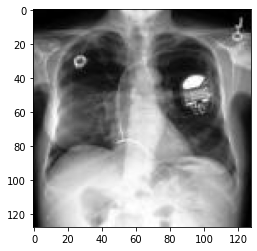

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train_array[0], cmap='gray')
print(X_train[0].shape)

In [13]:
Y_train = df_train['Edema']
Y_val = df_val['Edema']
#Y_test = df_test_demo['Edema']
print(Y_train[0])

0


In [28]:
import tensorflow.keras.utils as np_utils
Y_train_onehot = np_utils.to_categorical(Y_train)
Y_val_onehot = np_utils.to_categorical(Y_val)
print(Y_val_onehot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
# multiclass 對AGE項做one-hot
#0 = 00000
#1 = 01000
#2 = 00100
#3 = 00010
#4 = 00001

Age = pd.DataFrame(columns = ['age_0','age_1','age_2','age_3','age_4'])
Age_val = pd.DataFrame(columns = ['age_0','age_1','age_2','age_3','age_4'])
for i in range(len(df_train)) :
  if df_train['Age'].iloc[0] == 0 :
    row = pd.Series([1,0,0,0,0],index=['age_0','age_1','age_2','age_3','age_4'])
    Age = Age.append(row,ignore_index=True)
  elif df_train['Age'].iloc[i] == 1 :
    row = pd.Series([0,1,0,0,0],index=['age_0','age_1','age_2','age_3','age_4'])
    Age = Age.append(row,ignore_index=True)
  elif df_train['Age'].iloc[i] == 2 :
    row = pd.Series([0,0,1,0,0],index=['age_0','age_1','age_2','age_3','age_4'])
    Age = Age.append(row,ignore_index=True)
  elif df_train['Age'].iloc[i] == 3 :
    row = pd.Series([0,0,0,1,0],index=['age_0','age_1','age_2','age_3','age_4'])
    Age = Age.append(row,ignore_index=True)
  elif df_train['Age'].iloc[i] == 4 :
    row = pd.Series([0,0,0,0,1],index=['age_0','age_1','age_2','age_3','age_4'])
    Age = Age.append(row,ignore_index=True)

for i in range(len(df_val)) :
  if df_val['Age'].iloc[0] == 0 :
    row = pd.Series([1,0,0,0,0],index=['age_0','age_1','age_2','age_3','age_4'])
    Age_val = Age_val.append(row,ignore_index=True)
  elif df_val['Age'].iloc[i] == 1 :
    row = pd.Series([0,1,0,0,0],index=['age_0','age_1','age_2','age_3','age_4'])
    Age_val = Age_val.append(row,ignore_index=True)
  elif df_val['Age'].iloc[i] == 2 :
    row = pd.Series([0,0,1,0,0],index=['age_0','age_1','age_2','age_3','age_4'])
    Age_val = Age_val.append(row,ignore_index=True)
  elif df_val['Age'].iloc[i] == 3 :
    row = pd.Series([0,0,0,1,0],index=['age_0','age_1','age_2','age_3','age_4'])
    Age_val = Age_val.append(row,ignore_index=True)
  elif df_val['Age'].iloc[i] == 4 :
    row = pd.Series([0,0,0,0,1],index=['age_0','age_1','age_2','age_3','age_4'])
    Age_val = Age_val.append(row,ignore_index=True)



In [ ]:
Y_train_1 = pd.concat([df_train.iloc[:,0:7],Age,df_train.iloc[:,8:9]],axis = 1)
Y_val_1 = pd.concat([df_val.iloc[:,0:7],Age_val,df_val.iloc[:,8:9]],axis = 1)
Y_train_1.head()

,Atelectasis,Cardiomegaly,Edema,Lung Opacity,No Finding,Pleural Effusion,Support Devices,age_0,age_1,age_2,age_3,age_4,Gender
0,0,0,0,0,1,0,1,0,0,1,0,0,1
1,0,0,0,0,1,0,1,0,0,0,1,0,0
2,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,1,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,1


In [25]:
Y_train_1 = df_train.iloc[:,0:7]
Y_val_1 = df_val.iloc[:,0:7]

In [29]:
Y_train_onehot_1 = np_utils.to_categorical(Y_train_1)
Y_val_onehot_1 = np_utils.to_categorical(Y_val_1)
print(Y_val_onehot_1)

[[[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [0. 1.]
  [1. 0.]
  [1. 0.]]

 ...

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  ...
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [0. 1.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]
  [0. 1.]
  ...
  [1. 0.]
  [0. 1.]
  [0. 1.]]]


In [14]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

In [22]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

#fully connected

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(2,activation="softmax"))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

history = model.fit(x = X_train_1, y = Y_train_onehot , validation_data = (X_val_1, Y_val_onehot), epochs=20, batch_size=300, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0

In [23]:
prediction = model.predict(X_test_1)

In [24]:
classes_x = np.argmax(prediction ,axis=1)

X_predict = pd.DataFrame(classes_x, columns = ['Edema'])

X_predict.head(20)
#X_predict.to_csv('107000109_basic_prediction.csv')

,Edema
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,1


In [56]:
from tensorflow.keras import backend
backend.clear_session()

In [57]:
#multi-label
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(7,activation="sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

history = model.fit(x = X_train_1, y = Y_train_1 , validation_data = (X_val_1, Y_val_1), epochs=10, batch_size=300, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0

In [81]:
prediction = model.predict(X_test_1)

In [83]:
#classes_x = np.argmax(prediction ,axis=1)

X_predict_ad = pd.DataFrame(prediction, columns = ['Atelectasis','Cardiomegaly','Edema','Lung Opacity','No Finding','Pleural Effusion','Support Devices'])

X_predict_ad_1 = pd.DataFrame(prediction, columns = ['Atelectasis','Cardiomegaly','Edema','Lung Opacity','No Finding','Pleural Effusion','Support Devices'])
#X_predict_ad_1['Atelectasis'][0] = 0
#print(X_predict_ad['Atelectasis'])
for i in X_predict_ad_1 :
  for j in range(len(X_predict_ad_1[i])):
    if X_predict_ad[i][j] > 0.5 :
      print(X_predict_ad[i][j])
      X_predict_ad_1[i][j] = 1
    elif X_predict_ad[i][j] <= 0.5 :
      X_predict_ad_1[i][j] = 0
    
X_predict_ad_1.head(10)


0.69229263
0.565409
0.70114565
0.6794385
0.5618295
0.637183
0.7026754
0.6085809
0.5707206
0.6730119
0.62572503
0.5926013
0.62079227
0.58772457
0.73599946
0.50841415
0.63153774
0.6348957
0.6220746
0.66057223
0.6518539
0.74549687
0.60138917
0.6800037
0.68415034
0.71250033
0.68651915
0.53048724
0.7362146
0.5089652
0.51811016
0.70527595
0.71780133
0.53879327
0.77909833
0.67004716
0.5155523
0.74104595
0.5425751
0.6457026
0.5831184
0.7064149
0.6626514
0.7365253
0.63866687
0.5613904
0.666169
0.5072656
0.6146766
0.67414826
0.54119116
0.7124632
0.60087055
0.5633778
0.7268217
0.7381228
0.6341062
0.65513754
0.534256
0.63710475
0.75657094
0.6669988
0.7282844
0.6658122
0.63043225
0.5527938
0.7439201
0.6752049
0.6791302
0.5498977
0.74208033
0.6556042
0.6626966
0.6002268
0.5247292
0.6816432
0.716537
0.58089906
0.60306096
0.6813389
0.6790458
0.62912035
0.5947661
0.6135521
0.62949884
0.64741045
0.5919626
0.6601942
0.54419607
0.6972467
0.7083175
0.53578955
0.682922
0.63970095
0.5783429
0.55606365
0.5792

,Atelectasis,Cardiomegaly,Edema,Lung Opacity,No Finding,Pleural Effusion,Support Devices
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [91]:
X_predict_ad_1 = X_predict_ad_1.astype(int)
X_predict_ad_1.head(10)

,Atelectasis,Cardiomegaly,Edema,Lung Opacity,No Finding,Pleural Effusion,Support Devices
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0
9,0,0,1,0,0,0,1


In [92]:
X_predict_ad_1.to_csv('107000109_advanced_prediction.csv')